Coin Detection Problem

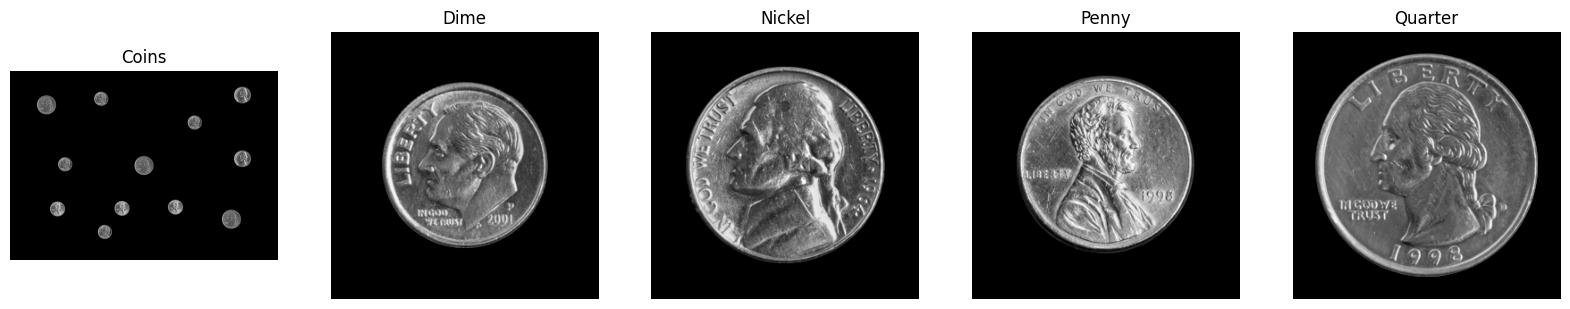

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max


# Load the images
Coins = cv.imread(r'D:\ENTC\5th sem\machine vision\open cv\coins\coins.png', cv.IMREAD_GRAYSCALE)
assert Coins is not None
Dime = cv.imread(r'D:\ENTC\5th sem\machine vision\open cv\coins\Dime.png', cv.IMREAD_GRAYSCALE)
assert Dime is not None
Nickel = cv.imread(r'D:\ENTC\5th sem\machine vision\open cv\coins\Nickel.png', cv.IMREAD_GRAYSCALE)
assert Nickel is not None
Penny = cv.imread(r'D:\ENTC\5th sem\machine vision\open cv\coins\Penny.png', cv.IMREAD_GRAYSCALE)
assert Penny is not None
Quarter = cv.imread(r'D:\ENTC\5th sem\machine vision\open cv\coins\Quarter.png', cv.IMREAD_GRAYSCALE)
assert Quarter is not None

# Create a single figure for all subplots
plt.figure(figsize=(20, 4))

# Display the "Coins" image
plt.subplot(1, 5, 1)
plt.imshow(Coins, cmap="gray")
plt.title("Coins")
plt.axis("off")

# Display the "Dime" image
plt.subplot(1, 5, 2)
plt.imshow(Dime, cmap="gray")
plt.title("Dime")
plt.axis("off")

# Display the "Nickel" image
plt.subplot(1, 5, 3)
plt.imshow(Nickel, cmap="gray")
plt.title("Nickel")
plt.axis("off")

# Display the "Penny" image
plt.subplot(1, 5, 4)
plt.imshow(Penny, cmap="gray")
plt.title("Penny")
plt.axis("off")

# Display the "Quarter" image
plt.subplot(1, 5, 5)
plt.imshow(Quarter, cmap="gray")
plt.title("Quarter")
plt.axis("off")

# Show the figure with all subplots
plt.show()


(-0.5, 3208.5, 2180.5, -0.5)

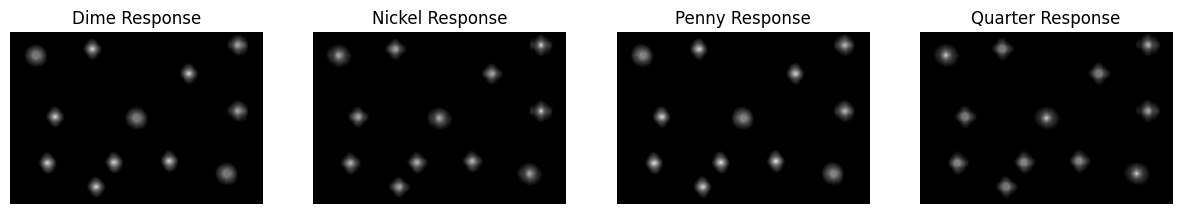

In [3]:
# Get the template matching responses
dime_response = cv.matchTemplate(Coins, Dime, cv.TM_CCOEFF_NORMED)
nickel_response = cv.matchTemplate(Coins, Nickel, cv.TM_CCOEFF_NORMED)
penny_response = cv.matchTemplate(Coins, Penny, cv.TM_CCOEFF_NORMED)
quarter_response = cv.matchTemplate(Coins, Quarter, cv.TM_CCOEFF_NORMED)


plt.figure(figsize=(15,15))


plt.subplot(1,4,1)
plt.imshow(X=dime_response, cmap="gray", vmin=0, vmax=1)
plt.title(label="Dime Response")
plt.axis("off")

plt.subplot(1,4,2)
plt.imshow(X=nickel_response, cmap="gray", vmin=0, vmax=1)
plt.title(label="Nickel Response")
plt.axis("off")

plt.subplot(1,4,3)
plt.imshow(X=penny_response, cmap="gray", vmin=0, vmax=1)
plt.title(label="Penny Response")
plt.axis("off")

plt.subplot(1,4,4)
plt.imshow(X=quarter_response, cmap="gray", vmin=0, vmax=1)
plt.title(label="Quarter Response")
plt.axis("off")

In [4]:
# vertically stack the responses along a new axis
stacked = np.stack(arrays=[dime_response,nickel_response,penny_response, quarter_response], axis=2)

In [5]:
stacked.shape

(2181, 3209, 4)

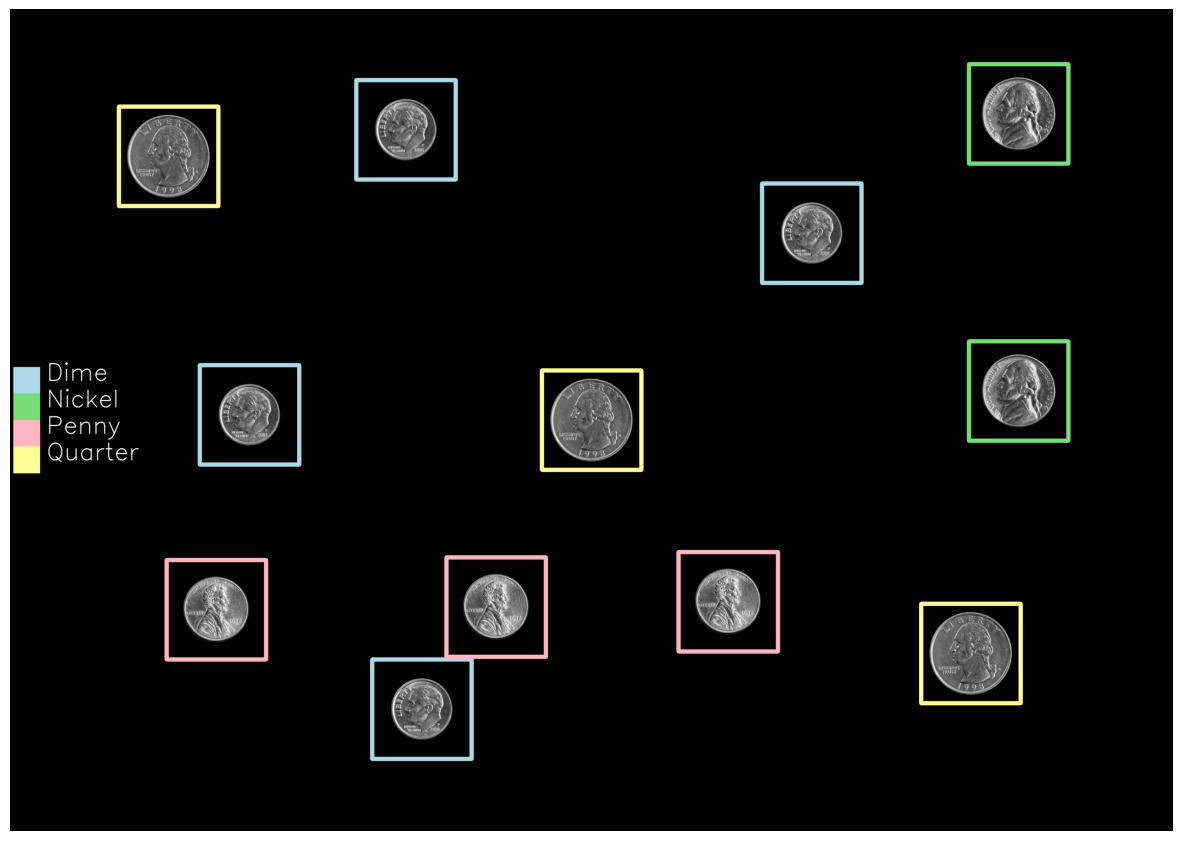

Dime: 4
Nickel: 2
Penny: 3
Quarter: 3


In [6]:
# Define pastel colors for coin types
pastel_colors = {
  "Dime": (173, 216, 230),     # Pastel Blue 
  "Nickel": (119, 221, 119),   # Pastel Green
  "Penny": (255, 182, 193),    # Pastel Pink 
  "Quarter": (253, 253, 150)   # Pastel Yellow
}

# Convert grayscale image to color
coins_color = cv.cvtColor(Coins, cv.COLOR_GRAY2BGR)

# Find local maxima in the stacked image
coordinates = peak_local_max(stacked, exclude_border=0, min_distance=5, threshold_abs=0.8)

# Define template shapes for each coin type
template_shapes = {
  "Dime": Dime.shape,
  "Nickel": Nickel.shape,
  "Penny": Penny.shape,  
  "Quarter":Quarter.shape
}

# Initialize counts for each coin type
coin_counts = {
    "Dime": 0,
    "Nickel": 0,
    "Penny": 0,
    "Quarter": 0
}

# Draw rectangles around detected coins and update counts
for y, x, c in coordinates:
    coin_type = list(template_shapes.keys())[c]
    coin_counts[coin_type] += 1
    cv.rectangle(coins_color,
                 (x, y),
                 (x + template_shapes[coin_type][1], y + template_shapes[coin_type][0]),
                 pastel_colors[coin_type],
                 thickness=12)

# Create legend
def create_legend(image, coin_types, colors, scale=0.8):
  rectangle_size = 100
  legend_height = int(len(coin_types) * rectangle_size * scale)
  start_y = (image.shape[0] - legend_height) // 2

  for i, (name, color) in enumerate(zip(coin_types, colors.values())):
      scaled_font_scale = scale * 3
      rect_top_left = (10, start_y + int(rectangle_size * scale * i))
      rect_bottom_right = (10 + int(rectangle_size * scale), start_y + int(rectangle_size * scale * (i + 1)))
        
      cv.rectangle(image, rect_top_left, rect_bottom_right, color=color, thickness=-1)
        
      text_x = 30 + int(rectangle_size * scale)
      text_y = start_y + int(rectangle_size * scale * (i + 0.5))
        
      cv.putText(image, name, (text_x, text_y), 
                 fontFace=cv.FONT_HERSHEY_SIMPLEX, 
                 fontScale=scaled_font_scale, 
                 color=(255, 255, 255), 
                 thickness=2, 
                 lineType=cv.LINE_AA)

# Add legend to the image
create_legend(coins_color, pastel_colors.keys(), pastel_colors)

# Display the result
plt.figure(figsize=(15,15))
plt.imshow(coins_color)
plt.axis("off")
plt.show()


# Print the counts of each coin type
for coin_type, count in coin_counts.items():
    print(f"{coin_type}: {count}")